In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df=pd.read_csv(r"C:\Users\Pardhasaradhi\Downloads\Food_Delivery_Time_Prediction.csv",encoding='cp1252')
df




,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [38]:
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [181]:
df = pd.get_dummies(df, columns=['Traffic_Conditions'], drop_first=True)

In [87]:
df.drop('Order_Priority', axis=1, inplace=True)

In [184]:
df=pd.get_dummies(df,columns=['Order_Time','Vehicle_Type'],drop_first=True)
#df=pd.get_dummies(df,columns=['Weather_Conditions'],drop_first=True)

KeyError: "None of [Index(['Order_Time', 'Vehicle_Type'], dtype='object')] are in the [columns]"

In [185]:
print(df.columns.tolist())

['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance', 'Delivery_Person_Experience', 'Order_Priority', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Delivery_Status', 'Delivery_Time_original', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Order_Time_Evening', 'Order_Time_Morning', 'Order_Time_Night', 'Vehicle_Type_Bike', 'Vehicle_Type_Car']


In [170]:
scaler=StandardScaler()
df['Delivery_Time_original']=df['Delivery_Time']
df[['Distance', 'Order_Cost', 'Delivery_Time']]=scaler.fit_transform(df[['Distance', 'Order_Cost', 'Delivery_Time']])

In [171]:
print("Mean after standardization:")
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].mean())

print("\nStandard deviation after standardization:")
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].std())

Mean after standardization:
Distance        -1.643130e-16
Order_Cost      -2.042810e-16
Delivery_Time    3.730349e-16
dtype: float64

Standard deviation after standardization:
Distance         1.002509
Order_Cost       1.002509
Delivery_Time    1.002509
dtype: float64


           Distance    Order_Cost  Delivery_Time
count  2.000000e+02  2.000000e+02   2.000000e+02
mean  -1.643130e-16 -2.042810e-16   3.730349e-16
std    1.002509e+00  1.002509e+00   1.002509e+00
min   -1.608593e+00 -1.688954e+00  -1.857269e+00
25%   -7.924313e-01 -9.013569e-01  -7.896704e-01
50%   -1.806765e-01 -1.925947e-02   7.662482e-02
75%    7.325599e-01  9.076026e-01   8.789834e-01
max    1.963762e+00  1.737826e+00   1.652608e+00

Median:
Distance        -0.180676
Order_Cost      -0.019259
Delivery_Time    0.076625
dtype: float64

Mode:
Distance        -1.491370
Order_Cost       1.401256
Delivery_Time   -0.122831
Name: 0, dtype: float64

Variance:
Distance         1.005025
Order_Cost       1.005025
Delivery_Time    1.005025
dtype: float64


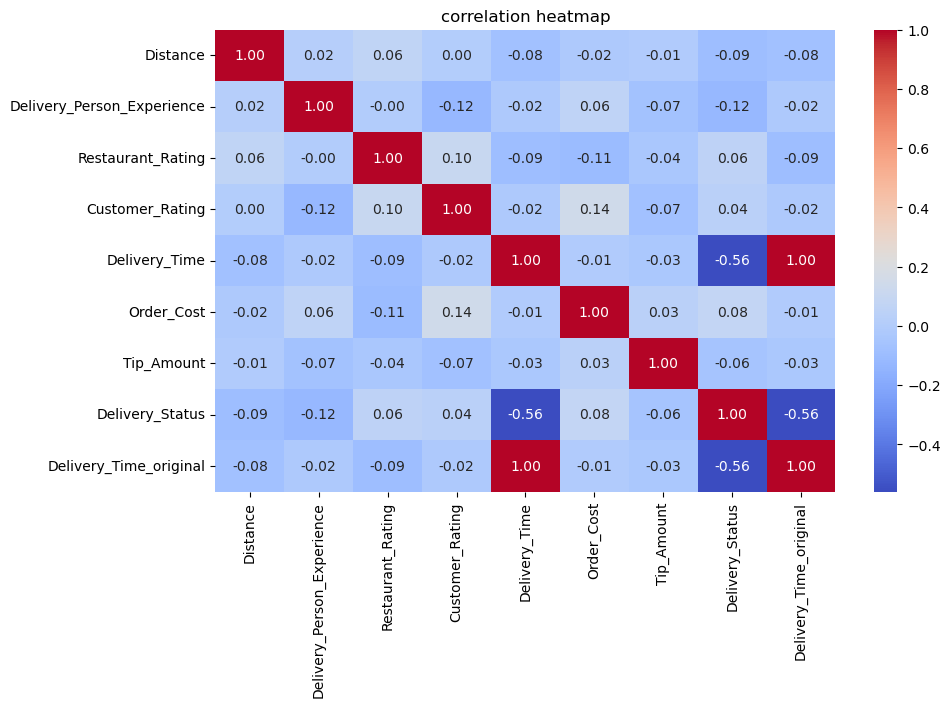

In [172]:
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].describe())


print("\nMedian:")
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].median())


print("\nMode:")
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].mode().iloc[0])

print("\nVariance:")
print(df[['Distance', 'Order_Cost', 'Delivery_Time']].var())

%matplotlib inline
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation heatmap")
plt.show(block=True)


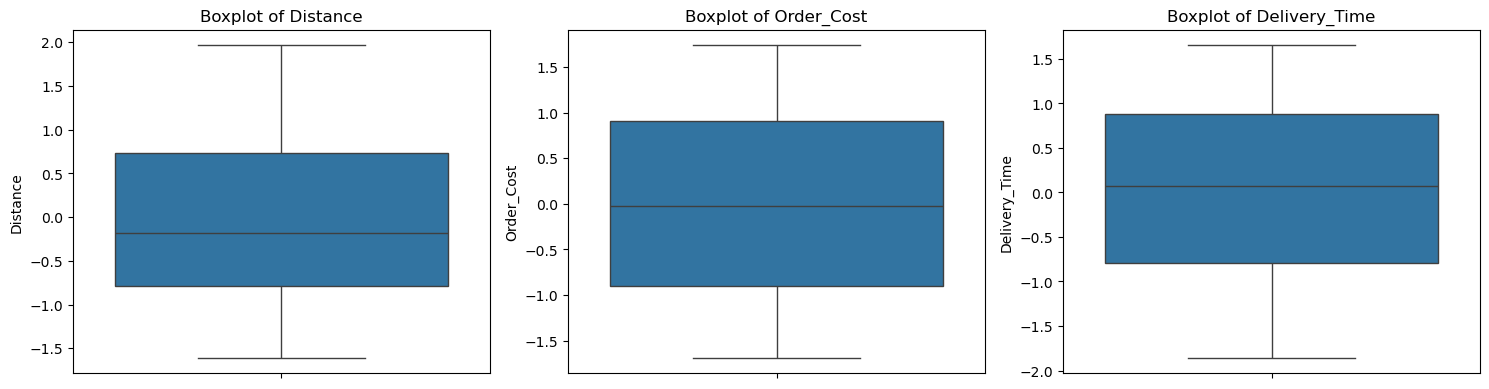

In [173]:
numeric_cols = ['Distance', 'Order_Cost', 'Delivery_Time']

plt.figure(figsize=(15, 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

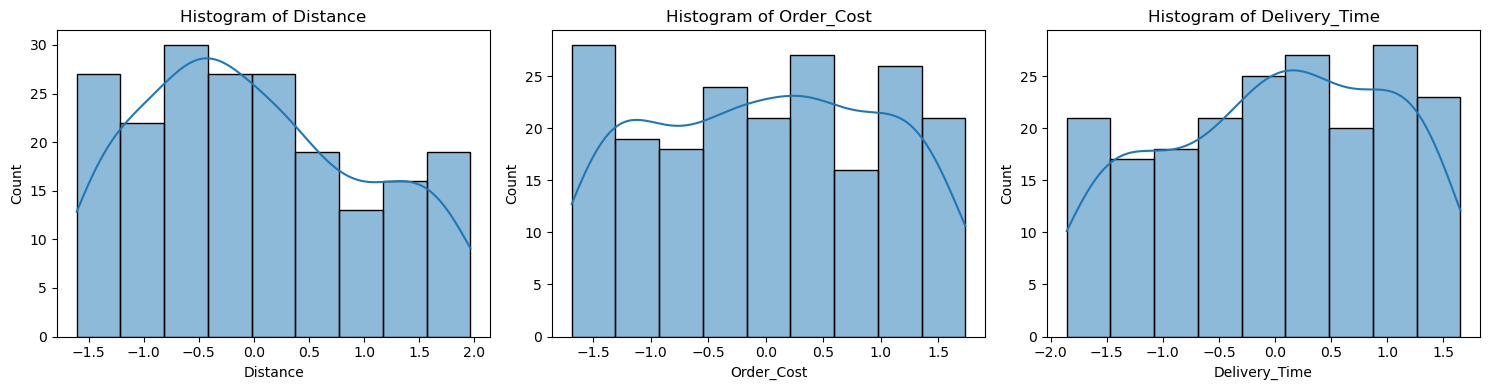

In [174]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [175]:
print(df[numeric_cols].agg(['min', 'max']))

     Distance  Order_Cost  Delivery_Time
min -1.608593   -1.688954      -1.857269
max  1.963762    1.737826       1.652608


In [186]:

df['Rush_Hour'] = df['Order_Time_Evening'].fillna(0)


df['Rush_Hour'] = df['Rush_Hour'].where(
    (df['Order_Time_Evening'] == 0) | (df['Order_Time_Night'] == 1),
    1
)

In [187]:
x = df[['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny', 'Rush_Hour', 'Order_Time_Evening', 'Order_Time_Morning', 'Order_Time_Night', 'Vehicle_Type_Bike', 'Vehicle_Type_Car']]
y=df['Delivery_Time']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
delivery_scaler = StandardScaler()
delivery_scaler.fit(df[['Delivery_Time']])

y_pred_real = delivery_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_real = delivery_scaler.inverse_transform(y_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Evaluation Metrics:
Mean Squared Error (MSE): 1.15
Mean Absolute Error (MAE): 0.91
R² Score: -0.10


In [ ]:
print(df.columns.tolist())

In [244]:
#logistic regression
threshold=df['Delivery_Time'].quantile(0.8)
df['Delivery_Status'] = (df['Delivery_Time'] <= threshold).astype(int)

In [245]:
x = df[['Distance',
    'Delivery_Person_Experience',
    'Order_Cost',
    'Rush_Hour',
    'Traffic_Conditions_Medium',
    'Weather_Conditions_Rainy',
    'Weather_Conditions_Snowy',
    'Vehicle_Type_Bike',
    'Vehicle_Type_Car',
    'Order_Time_Evening']]
y = df['Delivery_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
print("Evaluation Metrics (Logistic Regression):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

Evaluation Metrics (Logistic Regression):
Accuracy:  0.82
Precision: 0.82
Recall:    1.00
F1 Score:  0.90


In [246]:
print(df['Delivery_Status'].value_counts())

Delivery_Status
1    160
0     40
Name: count, dtype: int64


## Step 6 – Model Evaluation and Comparison

| Metric               | Linear Regression         | Logistic Regression (Q=0.10) |
|----------------------|----------------------------|-------------------------------|
| Goal             | Predict Delivery Time      | Classify as Fast or Delayed   |
| Accuracy         | —                          | 0.82                          |
| Precision        | —                          | 0.82                          |
| Recall           | —                          | 1.00                          |
| F1 Score         | —                          | 0.90                          |
| R² Score         | –0.10                      | —                             |
| MAE              | 0.91                       | —                             |
| MSE              | 1.15                       | —                             |


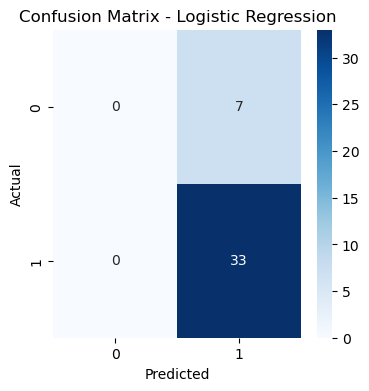

In [249]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show() 

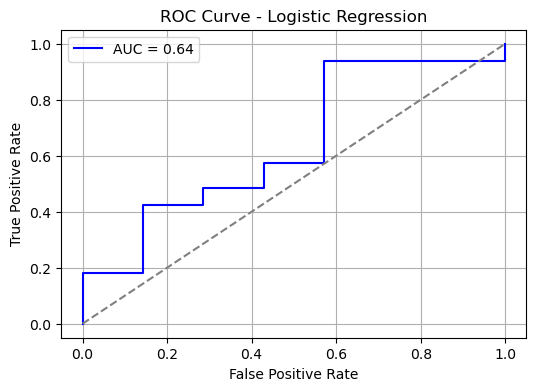

In [250]:
y_probs = log_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

| Feature                 | Impact                        |
| ----------------------- | ----------------------------- |
|Distance                 | Longer = more delay           |
|Rush Hour (Evening)      | More traffic = more delay     |
|Traffic Conditions       | Medium/High traffic = delay   |
|Weather Conditions       | Rainy/Snowy = delay           |
|Delivery Experience      | Less experienced = more delay |
|Vehicle Type             | Car vs Bike = affects speed   |


Step 7 – Actionable Insights

Based on the Logistic Regression model results, we suggest the following operational improvements:
 1. 🚗 Optimize Delivery Routes
- Use real-time traffic APIs to suggest the shortest and fastest paths.
- Prioritize faster routes during known rush-hour periods.
 2. 👥 Adjust Staffing During Rush Hours
- Increase the number of delivery personnel during evening and peak traffic times.
- Schedule experienced staff during high-risk time windows.
 3. 🌧 Improve Communication During Bad Weather
- Alert customers about possible delays during rainy or snowy conditions.
- Offer flexible delivery slots during adverse weather.
 4. 🎓 Invest in Delivery Staff Training
- Train new staff on best practices for route planning and time management.
- Offer incentives for consistent on-time delivery performance.
 5. 🛵 Assign Vehicles Based on Delivery Type
- Use bikes for short-distance, high-traffic areas.
- Use cars for longer routes with fewer congestion risks.


 Final Summary

The food delivery prediction model was developed using both Linear and Logistic Regression techniques. Linear Regression yielded a mean squared error (MSE) of 1.15, mean absolute error (MAE) of 0.91, and a negative R² score, indicating poor performance for continuous prediction. Logistic Regression, on the other hand, classified deliveries as "Fast" or "Delayed" with an accuracy of 82%, precision of 82%, recall of 100%, and F1-score of 90% using the 80th percentile as threshold. Key features affecting delivery time included Distance, Traffic Conditions, Weather, Delivery Experience, and Rush Hour. Based on these results, we recommend optimizing delivery routes during peak traffic, improving weather-specific planning, and scheduling experienced staff during rush hours to minimize delays and improve delivery efficiency.
